## Overview

This is a data science project to investigate the features (e.g. year of study, major, gender, etc.) that most likely lead to anxiety. As a student myself, I know mental health is a big issue post-secondary institutions try to tackle. While mental health is different for everyone, it could give insight into which combination of characteristics would lead to the most anxiety-inducing experience at university.

Credit: Dataset created by MD Shariful Islam, collected from the International Islamic University Malaysia

## Initial Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


In [2]:
file_path = '../input/student-mental-health/Student Mental health.csv'
health_data = pd.read_csv(file_path)

## Data Exploration

In [3]:
# summary of data
health_data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
# finding all avalible options for each column
print('Choose your gender: ', health_data['Choose your gender'].unique())
print('What is your course?: ', health_data['What is your course?'].unique())
print('Your current year of Study: ', health_data['Your current year of Study'].unique())
print('What is your CGPA?: ', health_data['What is your CGPA?'].unique())

print('Do you have Depression?: ', health_data['Do you have Depression?'].unique())
print('Do you have Anxiety?: ', health_data['Do you have Anxiety?'].unique())
print('Do you have Panic attack?: ', health_data['Do you have Panic attack?'].unique())
print('Did you seek any specialist for a treatment?: ', health_data['Did you seek any specialist for a treatment?'].unique())
print('Marital status: ', health_data['Marital status'].unique())

Choose your gender:  ['Female' 'Male']
What is your course?:  ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Your current year of Study:  ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
What is your CGPA?:  ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Do you have Depression?:  ['Yes' 'No']
Do you have Anxiety?:  ['No' 'Yes']
Do you have Panic attack?:  ['Yes' 'No']
Did you seek any specialist for a

In [5]:
# creating binary variables
health_data['Do you have Depression?'].replace(['Yes', 'No'],
                        [1,0], inplace=True)
health_data['Do you have Anxiety?'].replace(['Yes', 'No'],
                        [1,0], inplace=True)
health_data['Do you have Panic attack?'].replace(['Yes', 'No'],
                        [1,0], inplace=True)
health_data['Did you seek any specialist for a treatment?'].replace(['Yes', 'No'],
                        [1,0], inplace=True)
health_data['Marital status'].replace(['Yes', 'No'],
                        [1,0], inplace=True)

In [6]:
# describing data
health_data.describe()

,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,20.53000,0.158416,0.346535,0.336634,0.326733,0.059406
std,2.49628,0.366952,0.478239,0.474915,0.471358,0.237562
min,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.00000,0.000000,1.000000,1.000000,1.000000,0.000000
max,24.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [7]:
# lowercase
health_data['Choose your gender'] = health_data['Choose your gender'].str.lower()
health_data['What is your course?'] = health_data['What is your course?'].str.lower()
health_data['Your current year of Study'] = health_data['Your current year of Study'].str.lower()
health_data['What is your CGPA?'] = health_data['What is your CGPA?'].str.lower()

In [8]:
# trim whitespace
health_data['Choose your gender'] = health_data['Choose your gender'].str.strip()
health_data['What is your course?'] = health_data['What is your course?'].str.strip()
health_data['Your current year of Study'] = health_data['Your current year of Study'].str.strip()
health_data['What is your CGPA?'] = health_data['What is your CGPA?'].str.strip()

In [9]:
print('Choose your gender: ', health_data['Choose your gender'].unique())
print('What is your course?: ', health_data['What is your course?'].unique())
print('Your current year of Study: ', health_data['Your current year of Study'].unique())
print('What is your CGPA?: ', health_data['What is your CGPA?'].unique())

Choose your gender:  ['female' 'male']
What is your course?:  ['engineering' 'islamic education' 'bit' 'laws' 'mathemathics'
 'pendidikan islam' 'bcs' 'human resources' 'irkhs' 'psychology' 'kenms'
 'accounting' 'enm' 'marine science' 'koe' 'banking studies'
 'business administration' 'law' 'kirkhs' 'usuluddin' 'taasl' 'engine'
 'ala' 'biomedical science' 'benl' 'it' 'cts' 'engin' 'econs' 'mhsc'
 'malcom' 'kop' 'human sciences' 'biotechnology' 'communication'
 'diploma nursing' 'radiography' 'fiqh fatwa' 'diploma tesl' 'fiqh'
 'nursing']
Your current year of Study:  ['year 1' 'year 2' 'year 3' 'year 4']
What is your CGPA?:  ['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


## Data Visualizations

<AxesSubplot:title={'center':'cGPA'}>

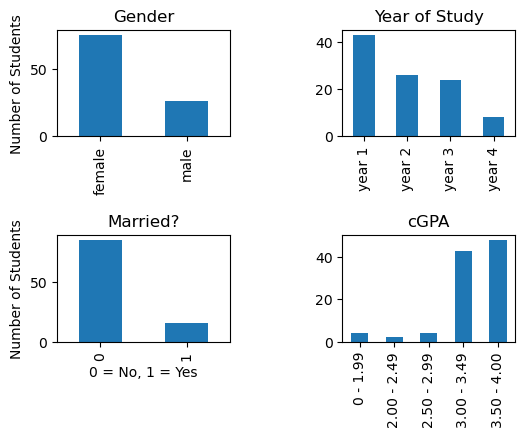

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=5)
health_data['Choose your gender'].value_counts().plot(kind='bar', title="Gender", ylabel="Number of Students",ax=axes[0,0])
health_data['Marital status'].value_counts().plot(kind='bar', title="Married?", xlabel="0 = No, 1 = Yes", ylabel="Number of Students",ax=axes[1,0])
health_data['Your current year of Study'].value_counts().plot(kind='bar', title="Year of Study",ax=axes[0,1])
health_data['What is your CGPA?'].value_counts().sort_index().plot(kind='bar', title="cGPA",ax=axes[1,1])


<AxesSubplot:title={'center':'Age'}>

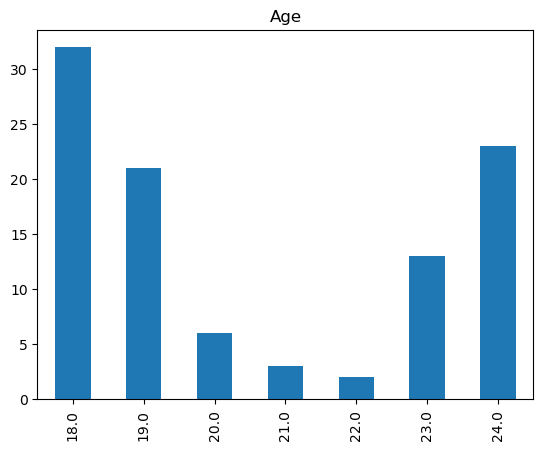

In [11]:
health_data['Age'].value_counts().sort_index().plot(kind='bar', title="Age")

<AxesSubplot:title={'center':'Major'}, ylabel='Number of Students'>

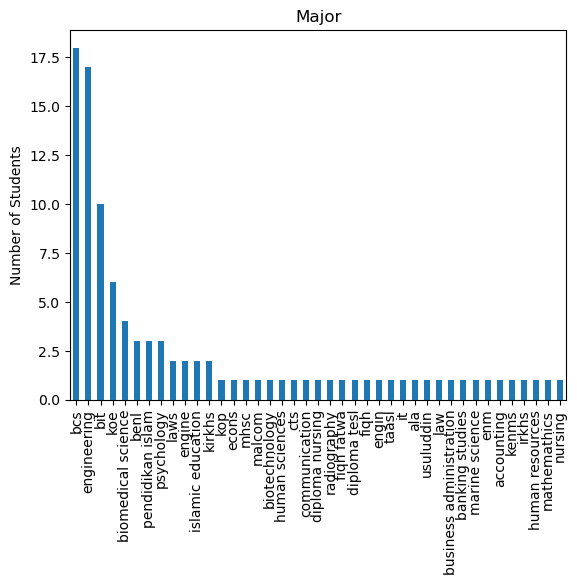

In [12]:
health_data['What is your course?'].value_counts().plot(kind='bar', title="Major", ylabel="Number of Students")

<AxesSubplot:title={'center':'Specialist Count'}, xlabel='0 = No, 1 = Yes'>

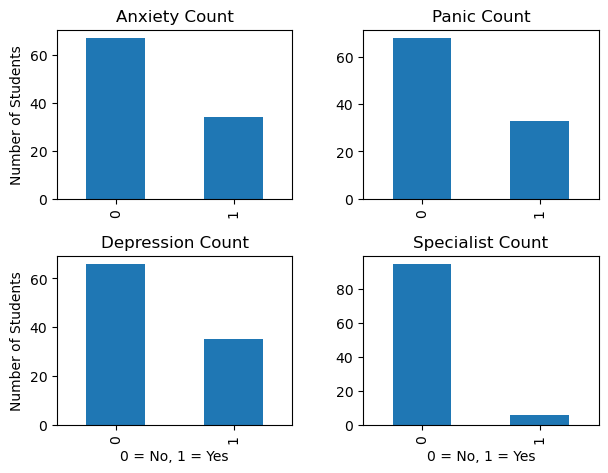

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=2.0)
health_data['Do you have Anxiety?'].value_counts().plot(kind='bar', title="Anxiety Count", ylabel="Number of Students",ax=axes[0,0])
health_data['Do you have Depression?'].value_counts().plot(kind='bar', title="Depression Count", xlabel="0 = No, 1 = Yes", ylabel="Number of Students",ax=axes[1,0])
health_data['Do you have Panic attack?'].value_counts().plot(kind='bar', title="Panic Count",ax=axes[0,1])
health_data['Did you seek any specialist for a treatment?'].value_counts().plot(kind='bar', title="Specialist Count", xlabel="0 = No, 1 = Yes",ax=axes[1,1])

## Modelling

In [14]:
# Random Forest Model